Shape of X: (95662, 39)
Shape of y: (95662,)
X_train shape: (76529, 39)
X_test shape: (19133, 39)
y_train shape: (76529,)
y_test shape: (19133,)
Accuracy: 0.9997909371243402
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.94      0.94      0.94        36

    accuracy                           1.00     19133
   macro avg       0.97      0.97      0.97     19133
weighted avg       1.00      1.00      1.00     19133



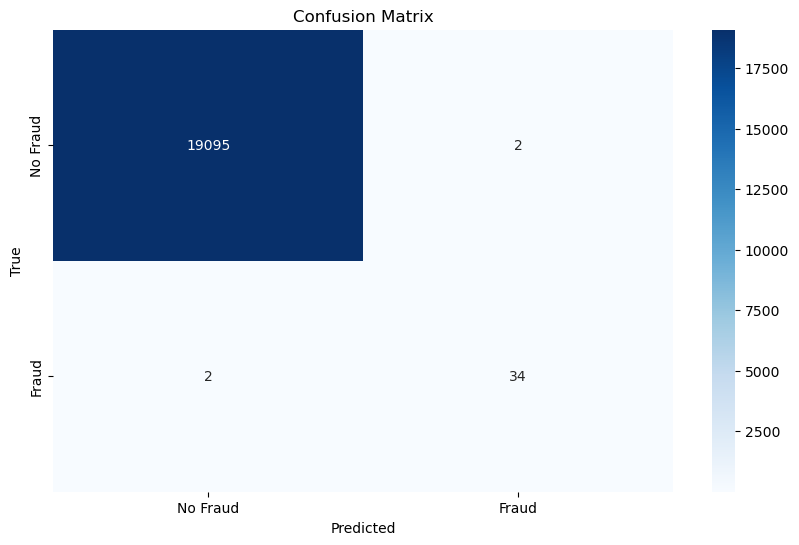

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv('../data/transformed_data.csv')  # Adjust the path if needed

# Use 'FraudResult' as the target column
X = df.drop(columns=['FraudResult'])  # Features
y = df['FraudResult']  # Target

# Verify shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify shapes of training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Drop non-numeric columns and handle missing values
X_train_numeric = X_train.select_dtypes(include=[np.number]).fillna(0)
X_test_numeric = X_test.select_dtypes(include=[np.number]).fillna(0)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the numeric training data and transform
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Use the same scaler to transform the test set
X_test_scaled = scaler.transform(X_test_numeric)

# Instantiate and train the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy: {accuracy_gb}')
print('Classification Report:')
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
plt.figure(figsize=(10, 6))
confusion_mat = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [2]:
import joblib

# After training your model
joblib.dump(gb_model, '../model/gradient_boosting_model.pkl')  # Save the model

# Later, to load the model
loaded_model = joblib.load('../model/gradient_boosting_model.pkl')

# Now you can use loaded_model to make predictions
y_pred_loaded = loaded_model.predict(X_test_scaled)


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/transformed_data.csv')  # Adjust the path if needed

# Display the first few rows of the dataset
print(df.head())

# Get the list of features by dropping the target column
features = df.drop(columns=['FraudResult']).columns.tolist()
print("Features: ", features)


         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode     ProductId  \
0  CustomerId_4406          UGX          256  ProductId_10   
1  CustomerId_4406          UGX          256   ProductId_6   
2  CustomerId_4683          UGX          256   ProductId_1   
3   CustomerId_988          UGX          256  ProductId_21   
4   CustomerId_988          UGX          256   ProductId_6   

        TransactionStartTime  FraudResult  ...  ProviderId_ProviderId_5  \
0  2018-11-15 02:18:49+00:00            0  ...                    False   
1 